Analizando AAPL entre 2025-01-01 y 2025-07-08...

--- DETECCIÓN DE CAÍDA SOSTENIDA (DRAWDOWN) ---

Condiciones: Caída > 20% desde el máximo de los últimos 10 días.
Se detectaron los siguientes eventos de caída sostenida (primer día del cruce):
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2025-04-08  172.194199      223.596786    -0.22989


/var/folders/10/fk397_5j2dq0zlh_718j39440000gq/T/ipykernel_19676/3160498869.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=inicio, end=fin, progress=False)


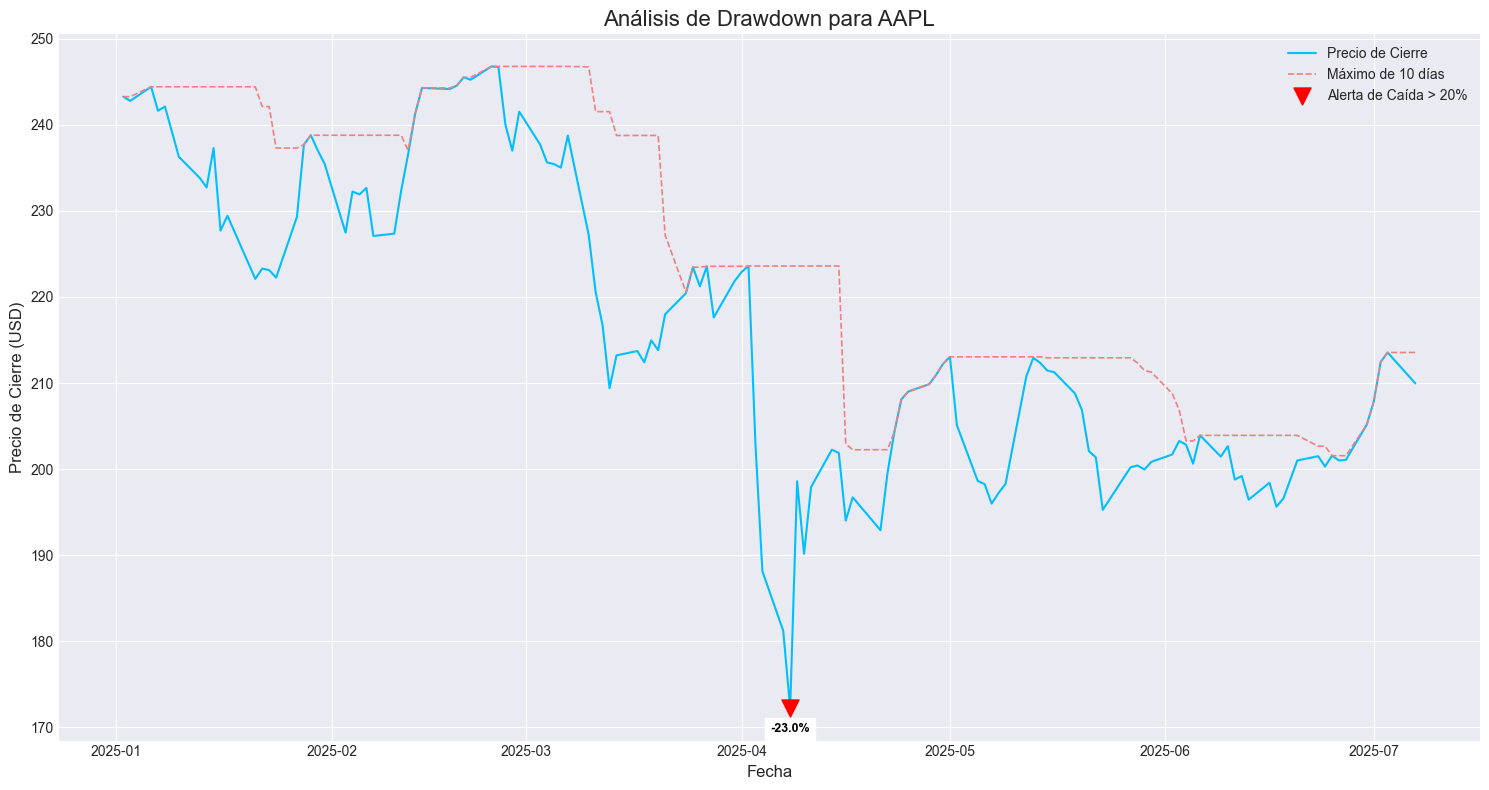

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def detectar_caidas_multi_dias(ticker='AAPL', inicio='2025-01-01', fin='2025-07-08', ventana_dias=60, umbral_drawdown=-0.20):
    """
    Detecta caídas sostenidas y anota el porcentaje de caída en el gráfico.
    """
    print(f"Analizando {ticker} entre {inicio} y {fin}...")

    # 1. Descargar datos
    data = yf.download(ticker, start=inicio, end=fin, progress=False)
    if data.empty:
        print(f"No se pudieron obtener datos para el ticker '{ticker}'.")
        return

    # Simplificamos el MultiIndex de las columnas si existe
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.droplevel(1)

    # 2. Calcular Drawdown
    data['Maximo_Ventana'] = data['Close'].rolling(window=ventana_dias, min_periods=1).max()
    denominator = data['Maximo_Ventana']
    data['Drawdown_%'] = np.where(denominator != 0, (data['Close'] - denominator) / denominator, np.nan)
    data['Alerta_Activa'] = data['Drawdown_%'] < umbral_drawdown
    primeros_eventos = data[data['Alerta_Activa'] & (data['Alerta_Activa'].shift(1) == False)]


    # 3. Mostrar resultados
    print("\n--- DETECCIÓN DE CAÍDA SOSTENIDA (DRAWDOWN) ---\n")
    print(f"Condiciones: Caída > {abs(umbral_drawdown):.0%} desde el máximo de los últimos {ventana_dias} días.")
    if not primeros_eventos.empty:
        print("Se detectaron los siguientes eventos de caída sostenida (primer día del cruce):")
        print(primeros_eventos[['Close', 'Maximo_Ventana', 'Drawdown_%']])
    else:
        print("No se encontraron caídas que cumplieran con el criterio de drawdown.")

    # 4. Visualización con anotaciones de porcentaje
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(data.index, data['Close'], label='Precio de Cierre', color='deepskyblue', linewidth=1.5)
    ax.plot(data.index, data['Maximo_Ventana'], label=f'Máximo de {ventana_dias} días', color='lightcoral', linestyle='--', linewidth=1.2)
    
    # Marcar los puntos de alerta
    ax.scatter(primeros_eventos.index, primeros_eventos['Close'], 
               color='red', marker='v', s=150, zorder=5, label=f'Alerta de Caída > {abs(umbral_drawdown):.0%}')
    
    # --- INICIO DE LA MODIFICACIÓN ---
    # Añadir el texto con el porcentaje de caída en cada punto
    for index, row in primeros_eventos.iterrows():
        # Formateamos el texto del porcentaje (ej. "-20.4%")
        texto_caida = f"{row['Drawdown_%']:.1%}"
        
        # Añadimos el texto en el gráfico, ligeramente por debajo del punto para que no se solape
        ax.text(x=index, 
                y=row['Close'] * 0.99,  # Posición Y ligeramente inferior al marcador
                s=texto_caida,          # El texto a mostrar
                color='black',
                backgroundcolor='white',
                ha='center',            # Alineación horizontal centrada
                va='top',               # Alineación vertical (el texto empieza debajo del punto Y)
                fontsize=9,
                fontweight='bold')
    # --- FIN DE LA MODIFICACIÓN ---
    
    ax.set_title(f'Análisis de Drawdown para {ticker}', fontsize=16)
    ax.set_xlabel('Fecha', fontsize=12)
    ax.set_ylabel('Precio de Cierre (USD)', fontsize=12)
    ax.legend()
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    detectar_caidas_multi_dias(
        ticker='AAPL',
        inicio='2025-01-01',
        fin='2025-07-08',
        ventana_dias=10,
        umbral_drawdown=-0.20
    )


2 Failed downloads:
['LVMH.PA', 'ITX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-07-08)')



📈 Analizando AAPL entre 2020-01-01 y 2025-07-08
✅ 2 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2020-03-23   54.378586       79.300591   -0.314273
2025-04-08  172.194199      246.776398   -0.302226


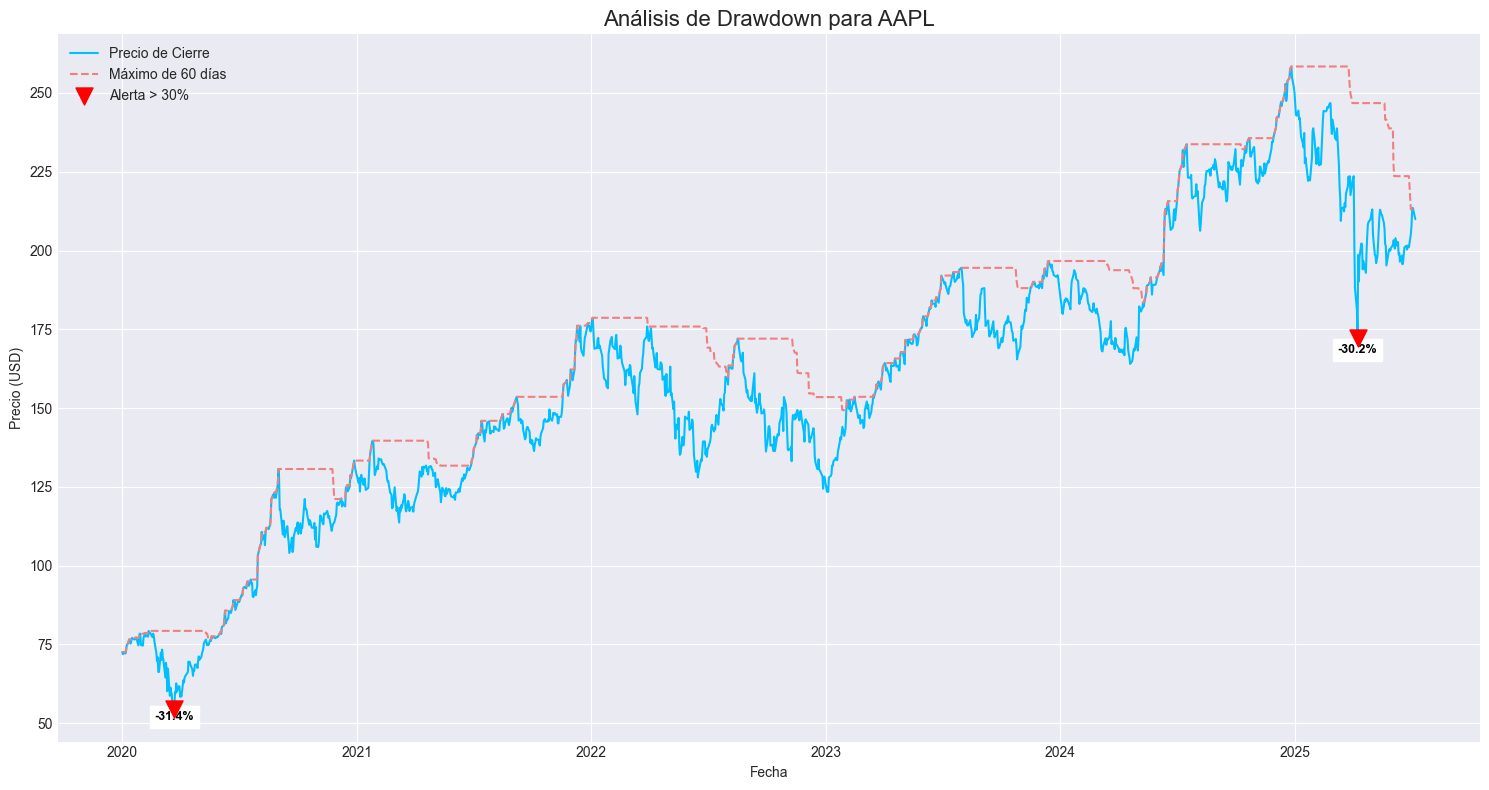


📈 Analizando MSFT entre 2020-01-01 y 2025-07-08
❌ No se detectaron caídas que cumplan el criterio.


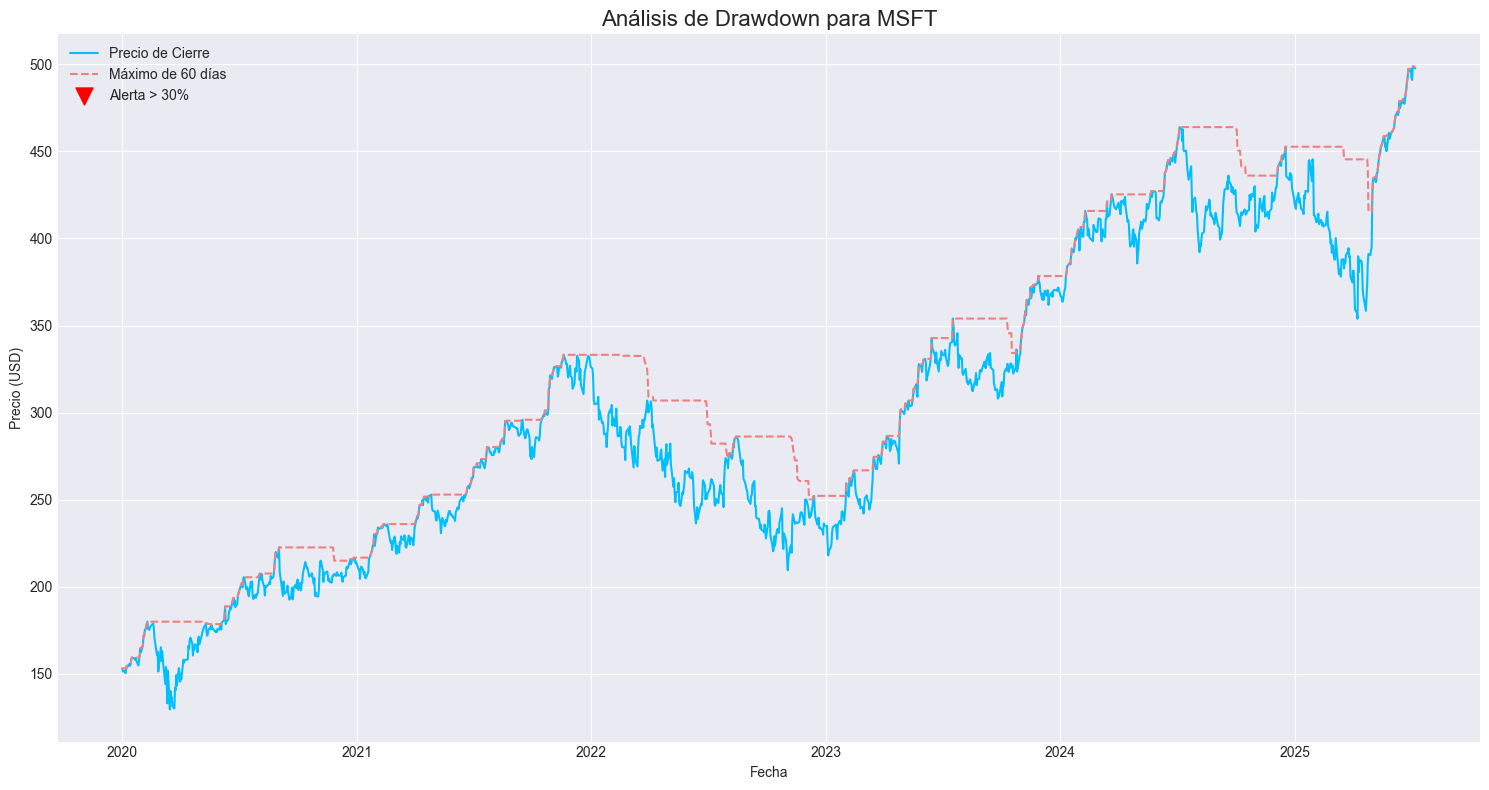


📈 Analizando AMZN entre 2020-01-01 y 2025-07-08
✅ 10 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2022-05-05  116.406998      169.315002   -0.312483
2022-06-09  116.150002      169.315002   -0.314001
2022-07-12  109.220001      158.115494   -0.309239
2022-11-01   96.790001      144.779999   -0.331468
2022-11-17   94.849998      137.279999   -0.309076
2022-12-01   95.500000      136.449997   -0.300110
2022-12-22   83.790001      121.089996   -0.308035
2022-12-27   83.040001      121.089996   -0.314229
2023-01-05   83.120003      120.599998   -0.310779
2025-04-21  167.320007      242.059998   -0.308766


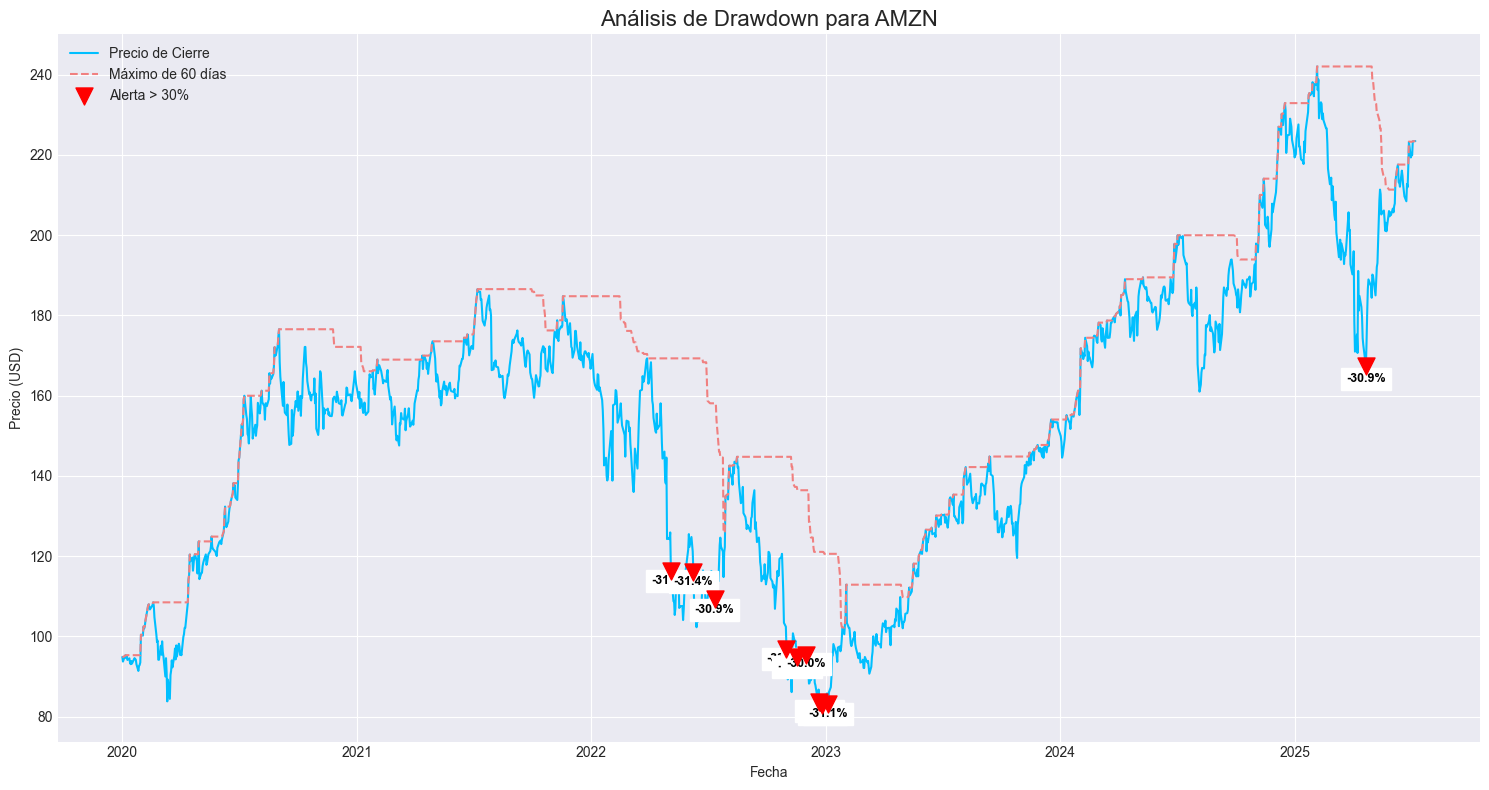


📈 Analizando GOOGL entre 2020-01-01 y 2025-07-08
✅ 2 evento(s) de drawdown detectados:
Price           Close  Maximo_Ventana  Drawdown_%
Date                                             
2020-03-23  52.392284       75.788963   -0.308708
2022-11-03  82.932632      121.352211   -0.316596


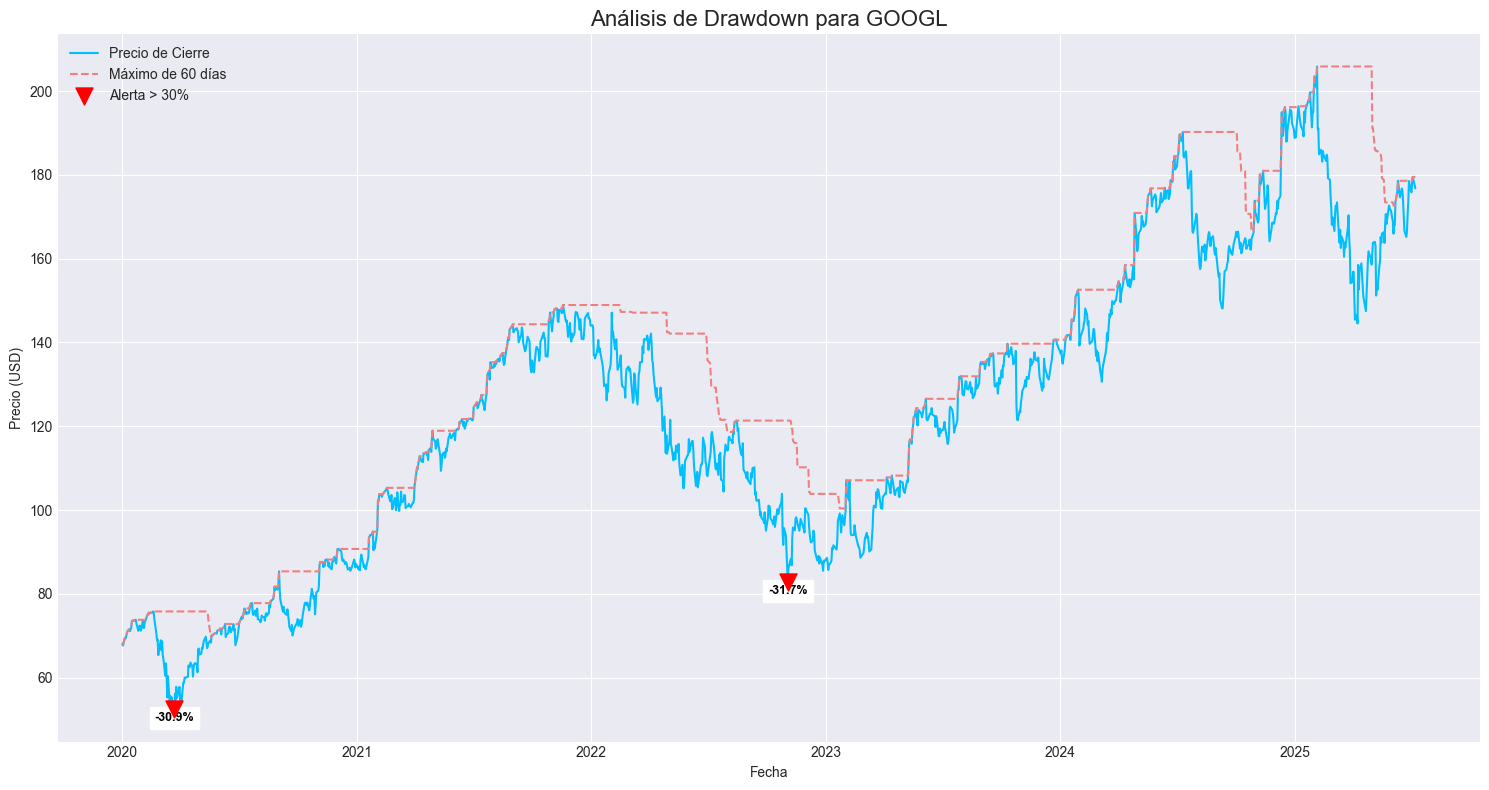


📈 Analizando NVDA entre 2020-01-01 y 2025-07-08
✅ 13 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2020-03-12    5.387524        7.833391   -0.312236
2020-03-16    4.891635        7.833391   -0.375541
2022-01-25   22.283337       33.311127   -0.331054
2022-02-23   22.346220       33.311127   -0.329166
2022-03-07   21.316738       30.888634   -0.309884
2022-03-14   21.294777       30.888634   -0.310595
2022-04-22   19.482769       28.608677   -0.318991
2022-05-05   18.812878       28.608677   -0.342407
2022-07-11   15.130177       22.166332   -0.317425
2022-09-13   13.115983       19.187323   -0.316425
2022-11-02   13.203883       19.004585   -0.305226
2025-04-03  101.792931      147.196243   -0.308454
2025-04-17  101.482948      147.196243   -0.310560


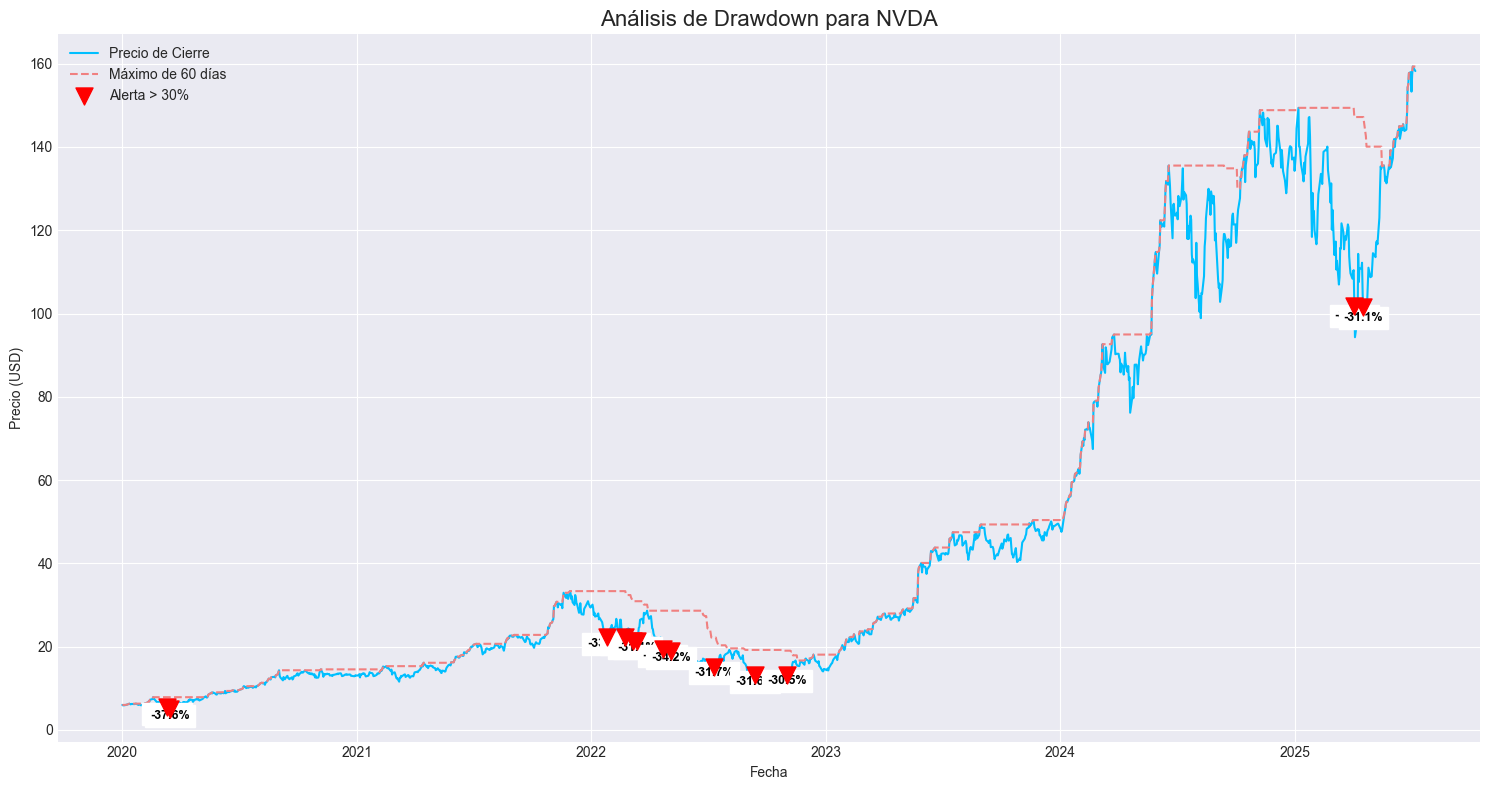


📈 Analizando BRK-B entre 2020-01-01 y 2025-07-08
❌ No se detectaron caídas que cumplan el criterio.


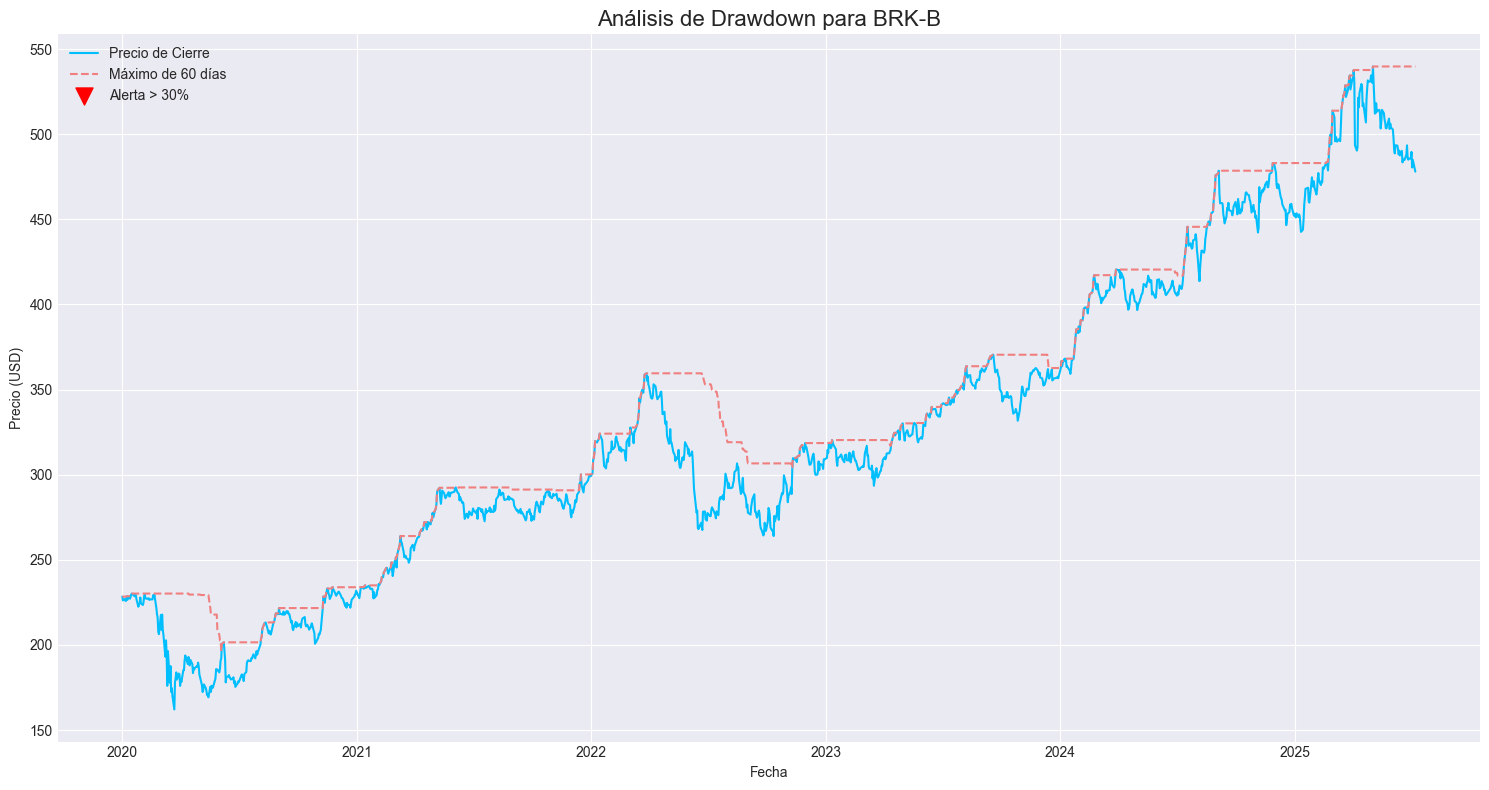


📈 Analizando V entre 2020-01-01 y 2025-07-08
✅ 2 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2020-03-18  143.055984      205.517761   -0.303924
2020-03-20  141.466232      205.517761   -0.311659


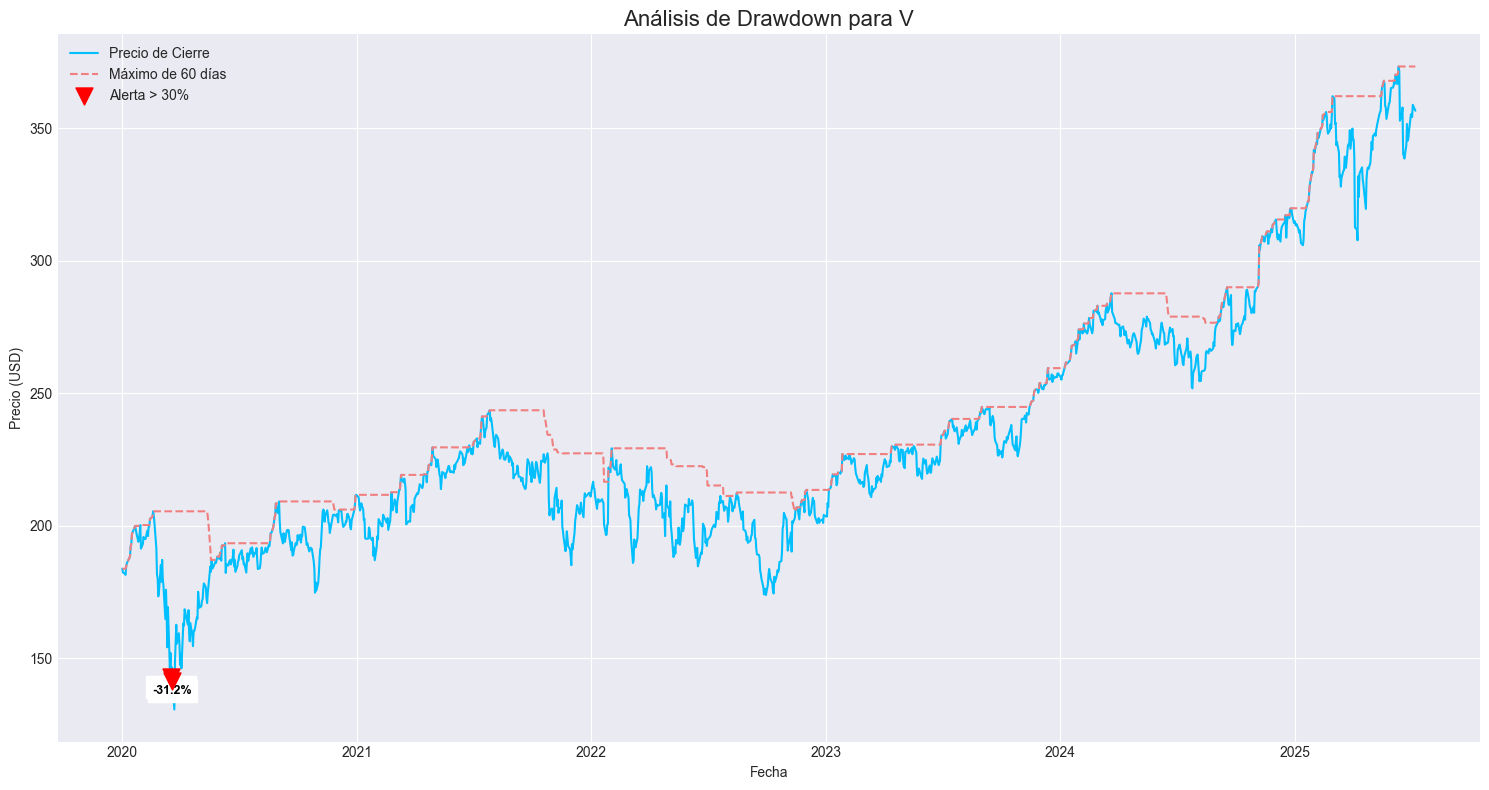


📈 Analizando MA entre 2020-01-01 y 2025-07-08
✅ 2 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2020-03-16  228.757034      334.481384   -0.316084
2020-04-01  221.922958      334.481384   -0.336516


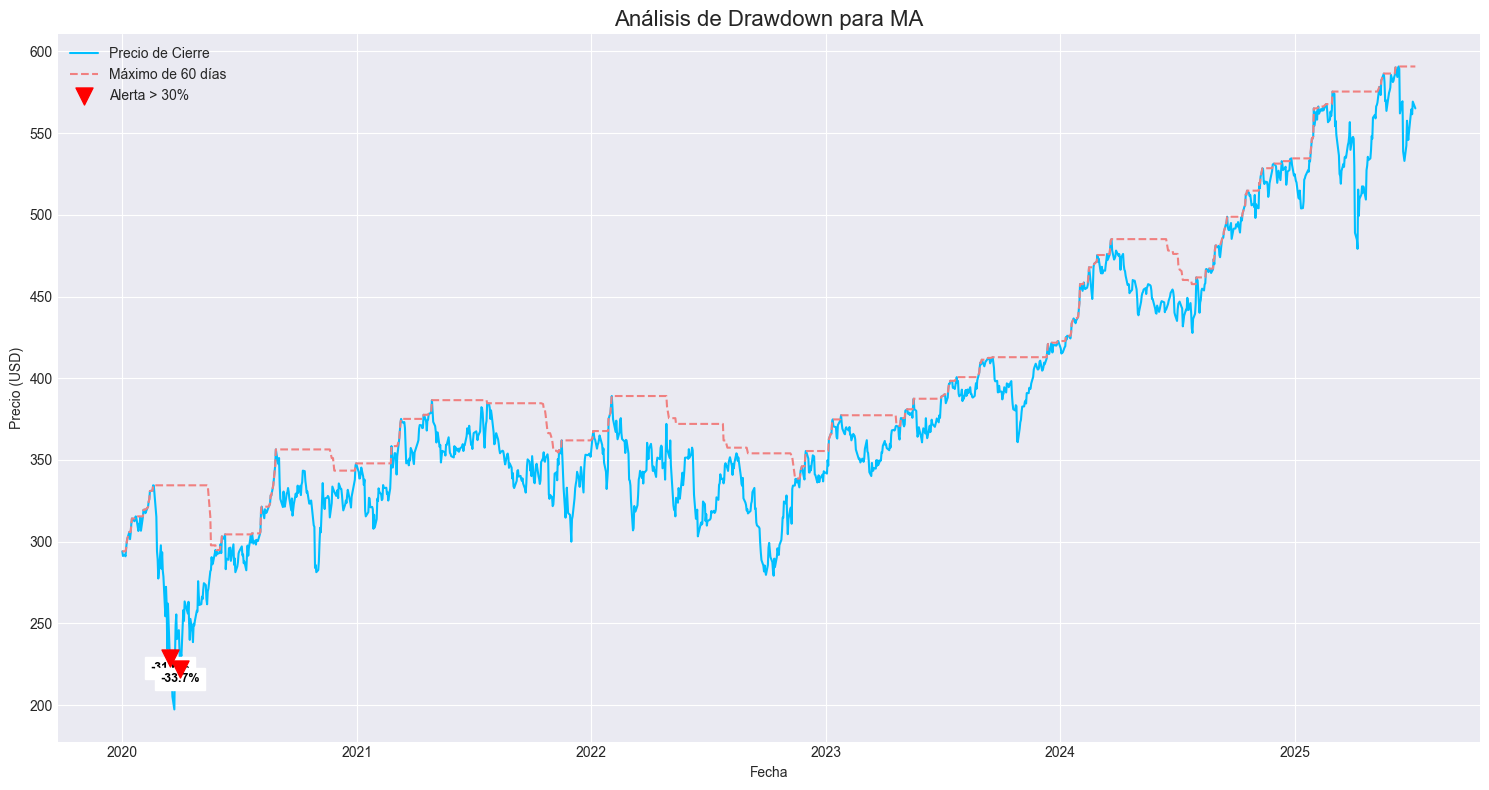


📈 Analizando UNH entre 2020-01-01 y 2025-07-08
✅ 3 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2020-03-20  190.610168      280.479187   -0.320412
2025-04-25  415.689117      595.244446   -0.301650
2025-04-29  406.345428      595.244446   -0.317347


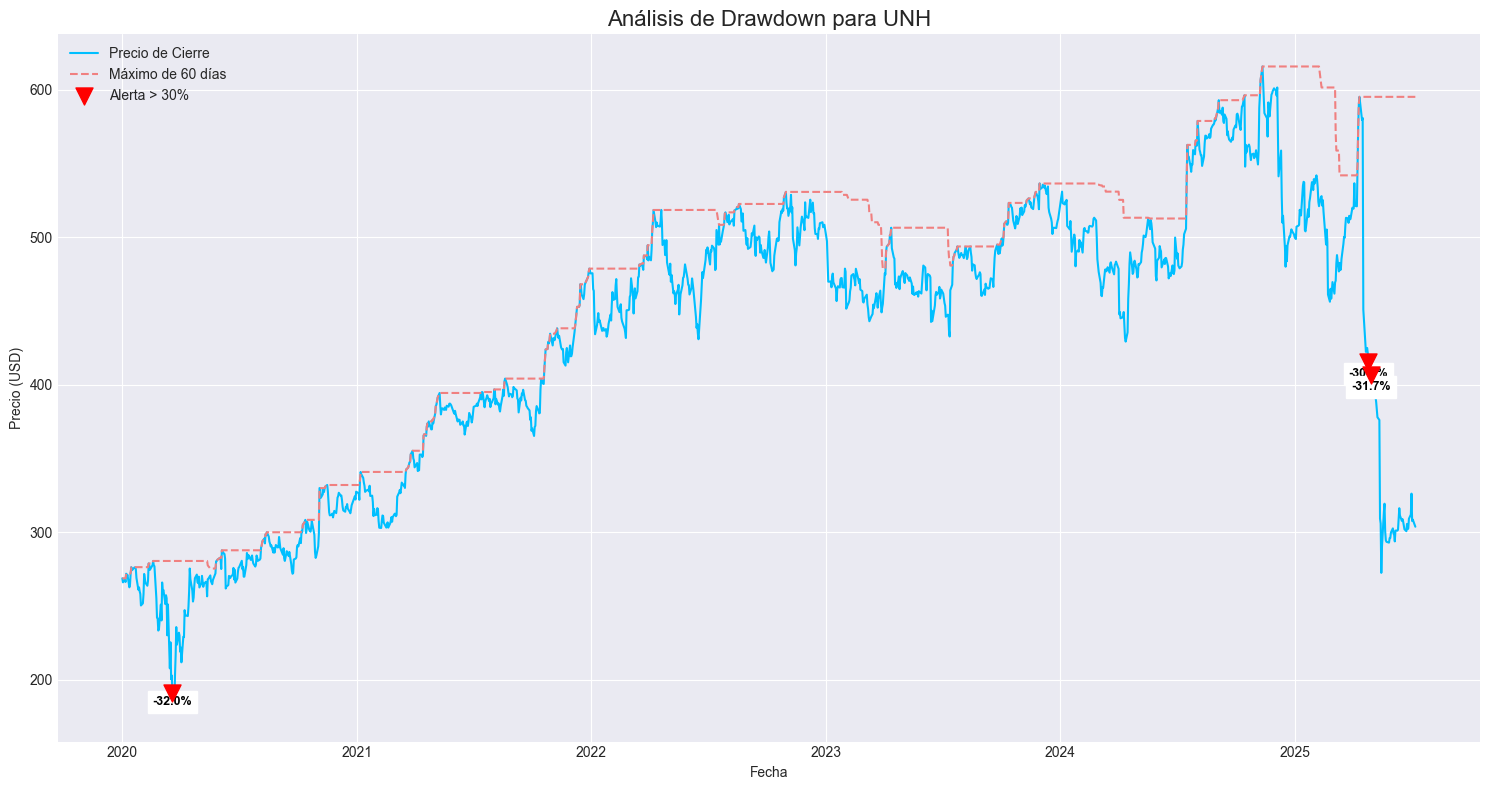


📈 Analizando COST entre 2020-01-01 y 2025-07-08
✅ 1 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2022-05-19  405.620941      582.217468   -0.303317


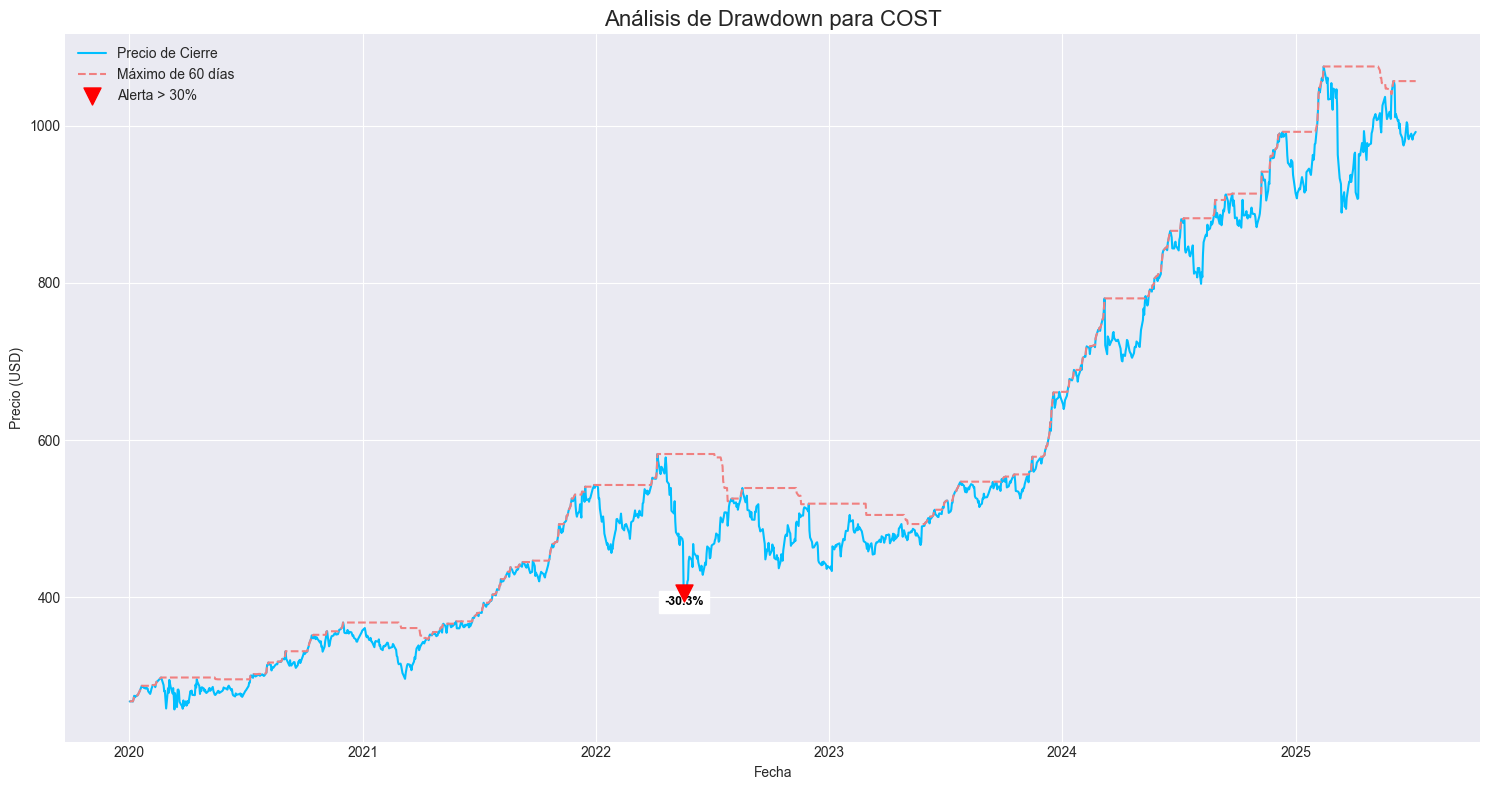


📈 Analizando ITX entre 2020-01-01 y 2025-07-08
⚠️  Datos vacíos para ITX

📈 Analizando IXD1.DE entre 2020-01-01 y 2025-07-08
✅ 6 evento(s) de drawdown detectados:
Price           Close  Maximo_Ventana  Drawdown_%
Date                                             
2020-03-12  18.976059       28.883673   -0.343018
2020-04-02  19.580624       28.883673   -0.322087
2020-05-04  19.851322       28.883673   -0.312715
2022-03-07  17.998312       26.161182   -0.312022
2022-04-04  18.089212       25.952108   -0.302977
2022-04-13  18.139208       25.952108   -0.301051


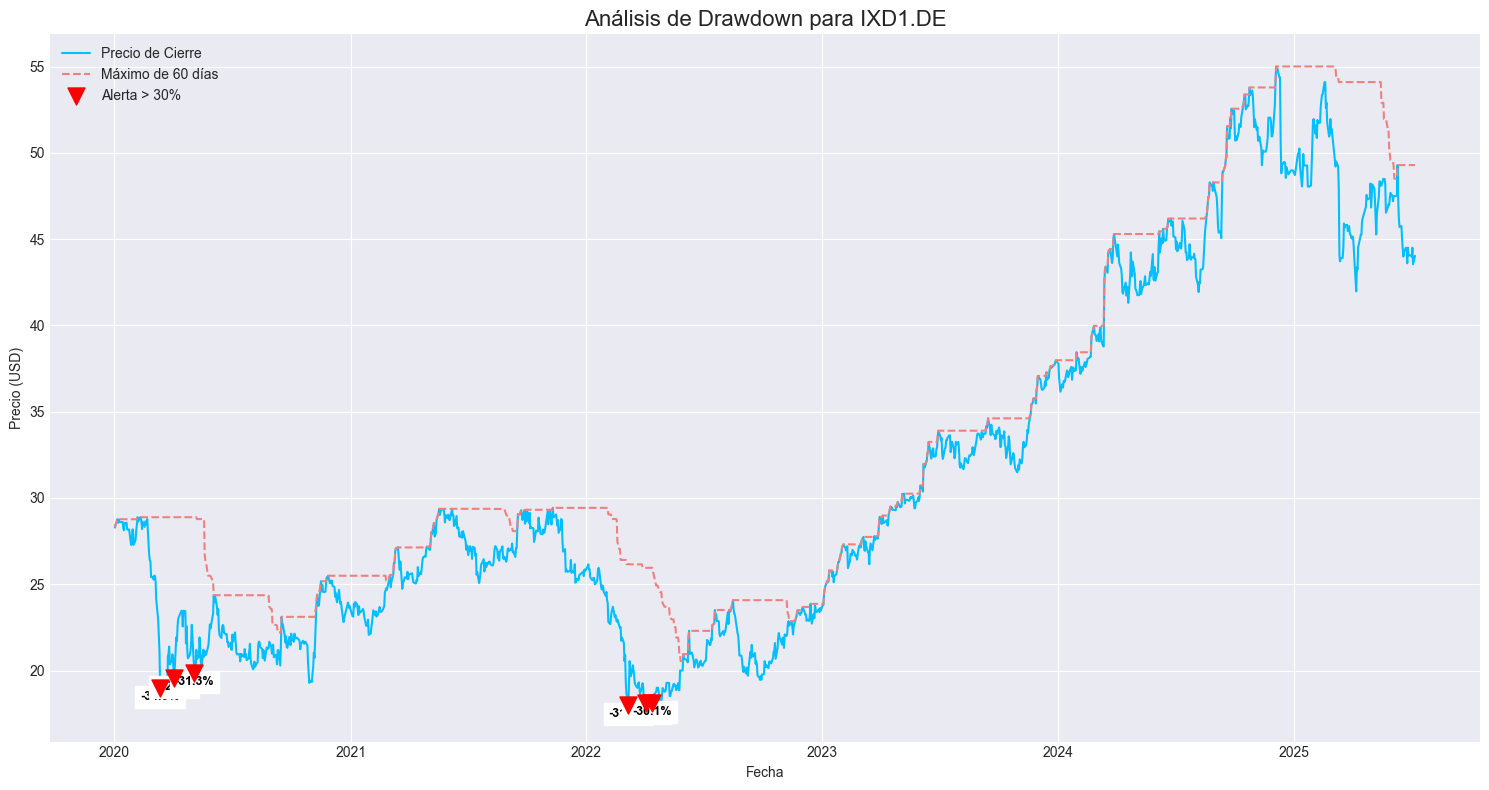


📈 Analizando ITX.MC entre 2020-01-01 y 2025-07-08
✅ 8 evento(s) de drawdown detectados:
Price           Close  Maximo_Ventana  Drawdown_%
Date                                             
2020-03-12  19.365257       29.484459   -0.343205
2020-04-02  20.109722       29.484459   -0.317955
2020-05-04  19.990240       29.484459   -0.322008
2020-05-15  20.624416       29.484459   -0.300499
2022-03-07  18.407387       26.796268   -0.313062
2022-03-31  18.314795       26.472193   -0.308150
2022-04-04  18.407387       26.472193   -0.304652
2022-04-06  18.277760       26.472193   -0.309549


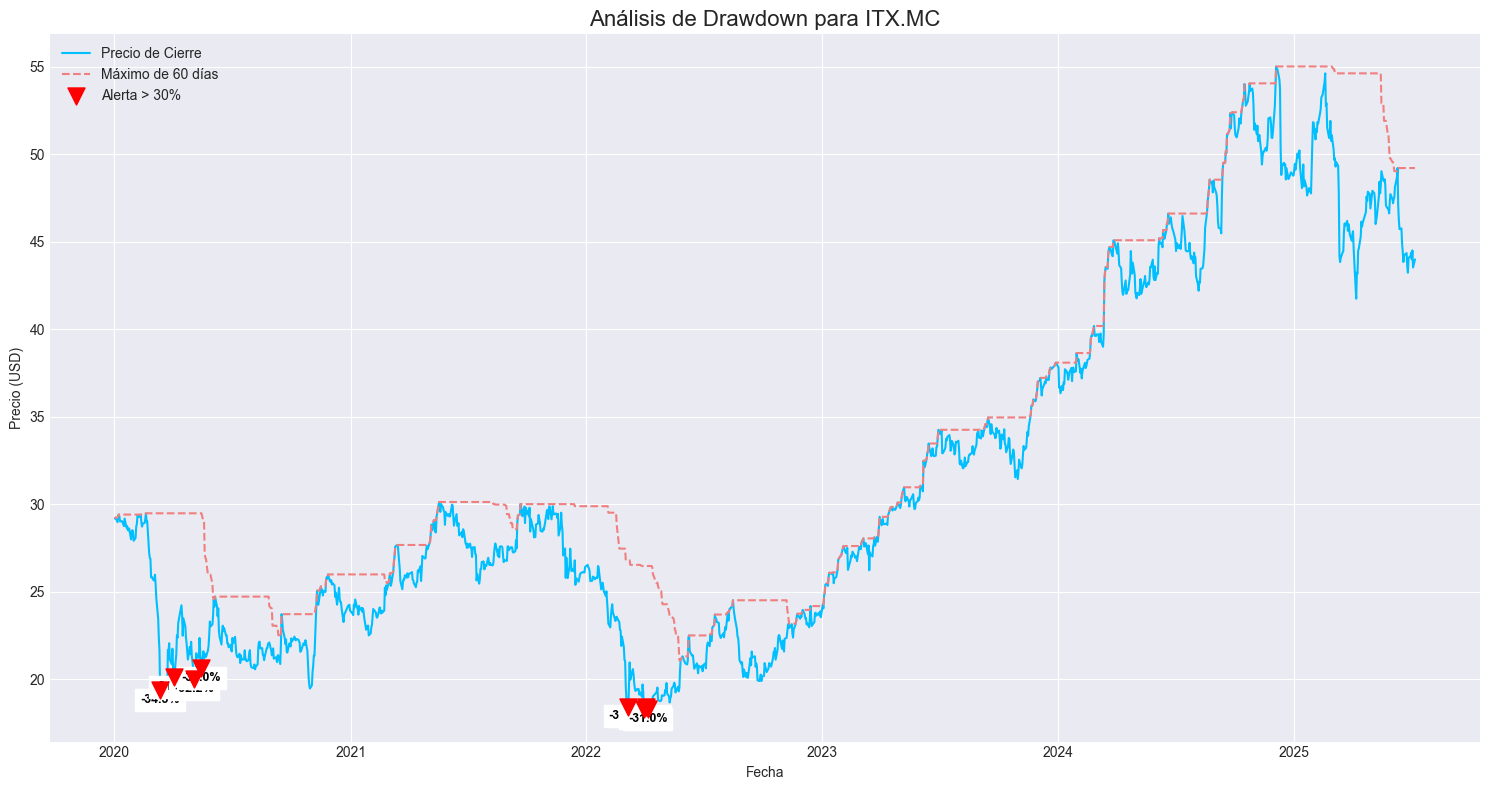


📈 Analizando ASML.AS entre 2020-01-01 y 2025-07-08
✅ 4 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2020-03-18  176.863113      278.709259   -0.365421
2022-07-05  397.478088      570.770935   -0.303612
2022-10-14  387.183136      561.315674   -0.310222
2024-09-06  675.843689      992.769043   -0.319234


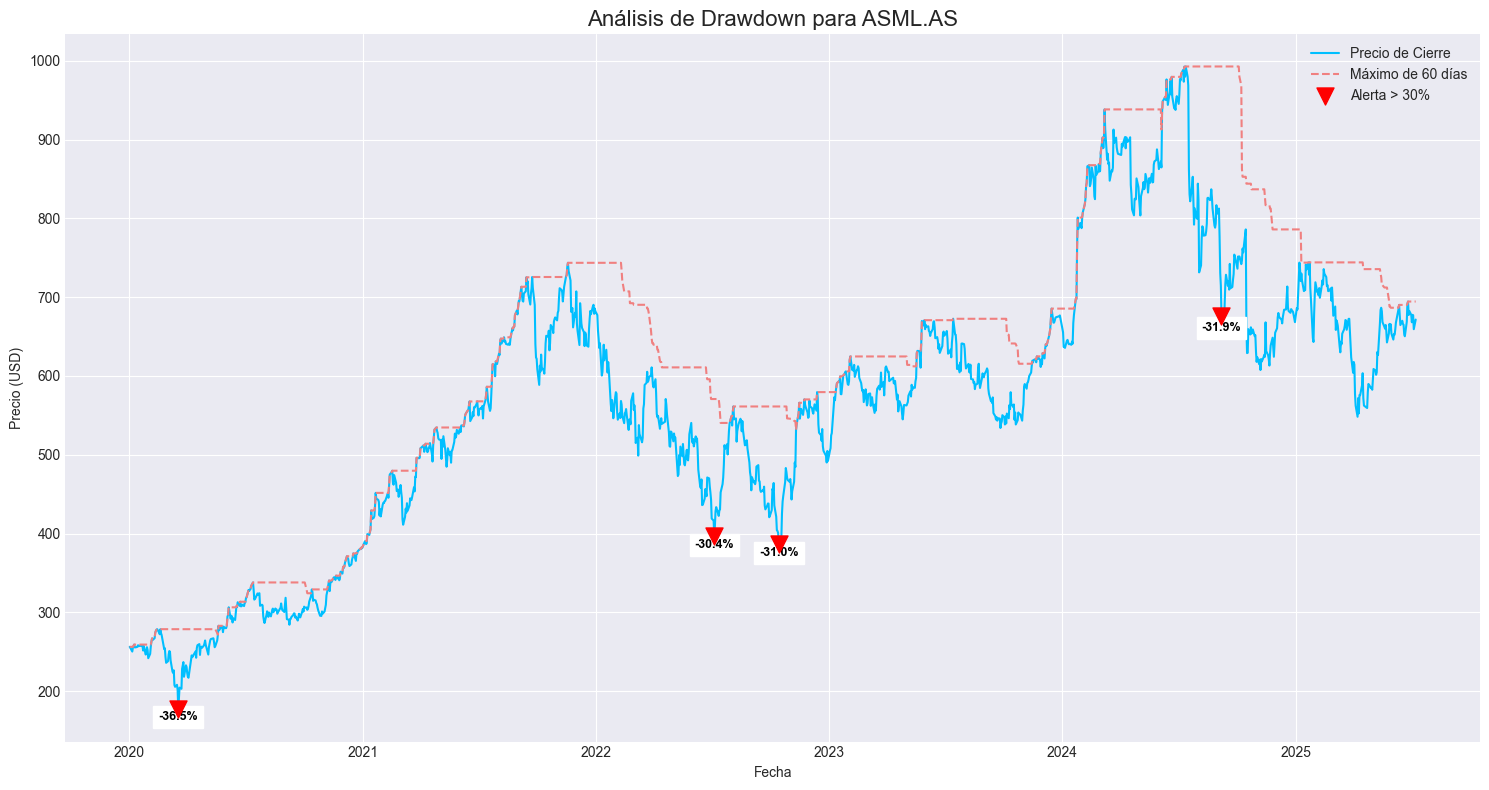


📈 Analizando LVMH.PA entre 2020-01-01 y 2025-07-08
⚠️  Datos vacíos para LVMH.PA

📈 Analizando NESN.SW entre 2020-01-01 y 2025-07-08
❌ No se detectaron caídas que cumplan el criterio.


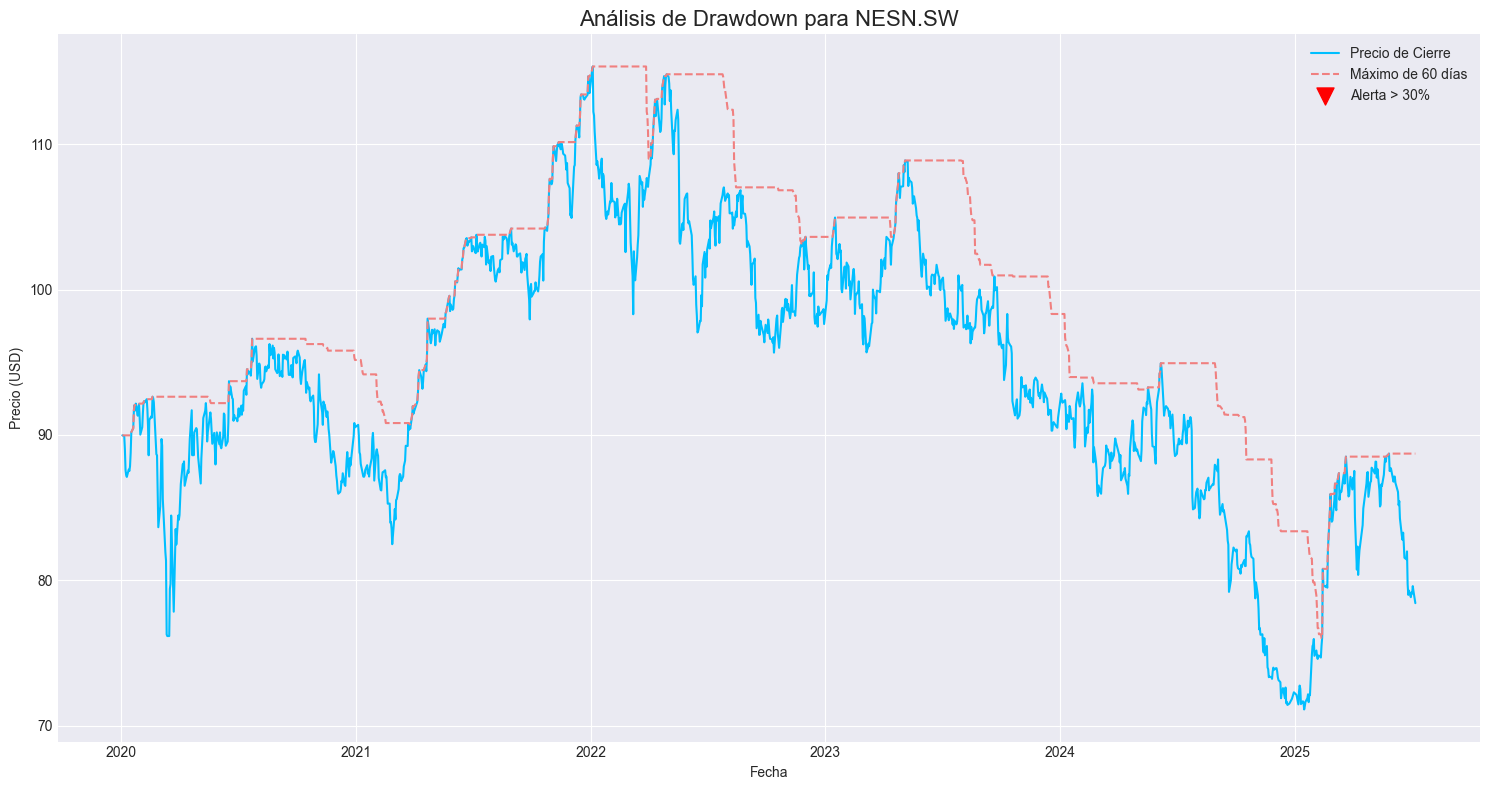


📈 Analizando SAP.DE entre 2020-01-01 y 2025-07-08
✅ 5 evento(s) de drawdown detectados:
Price           Close  Maximo_Ventana  Drawdown_%
Date                                             
2020-03-16  82.690796      119.245735   -0.306551
2020-03-18  82.055138      119.245735   -0.311882
2020-10-26  91.127777      132.962418   -0.314635
2020-11-17  92.090454      132.962418   -0.307395
2020-11-20  92.342804      132.252090   -0.301767


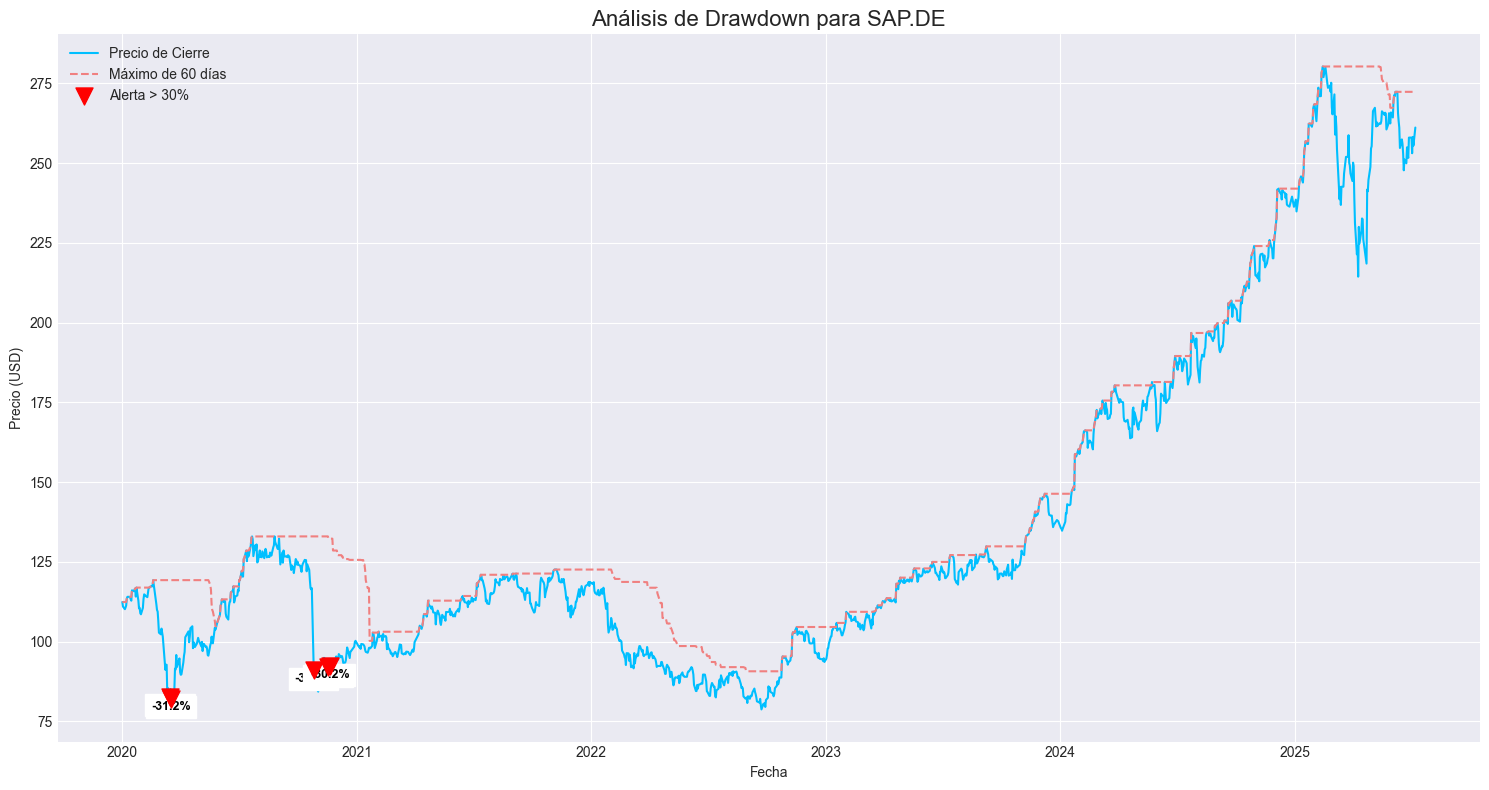


📈 Analizando NOVN.SW entre 2020-01-01 y 2025-07-08
❌ No se detectaron caídas que cumplan el criterio.


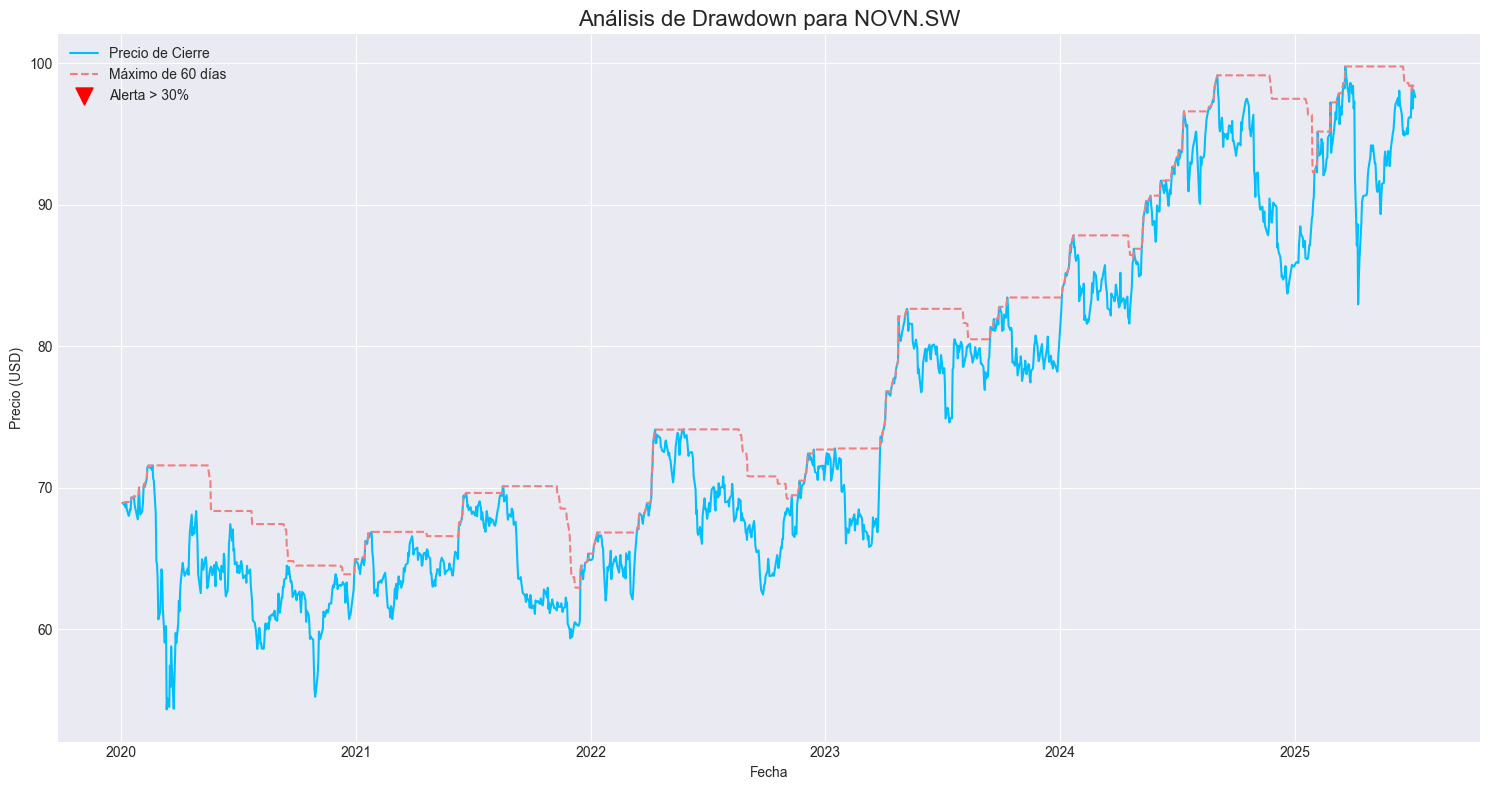


📈 Analizando SIE.DE entre 2020-01-01 y 2025-07-08
✅ 3 evento(s) de drawdown detectados:
Price           Close  Maximo_Ventana  Drawdown_%
Date                                             
2020-03-11  62.833584       89.963326   -0.301564
2020-04-15  61.927063       89.417358   -0.307438
2020-04-21  61.123020       88.204094   -0.307027


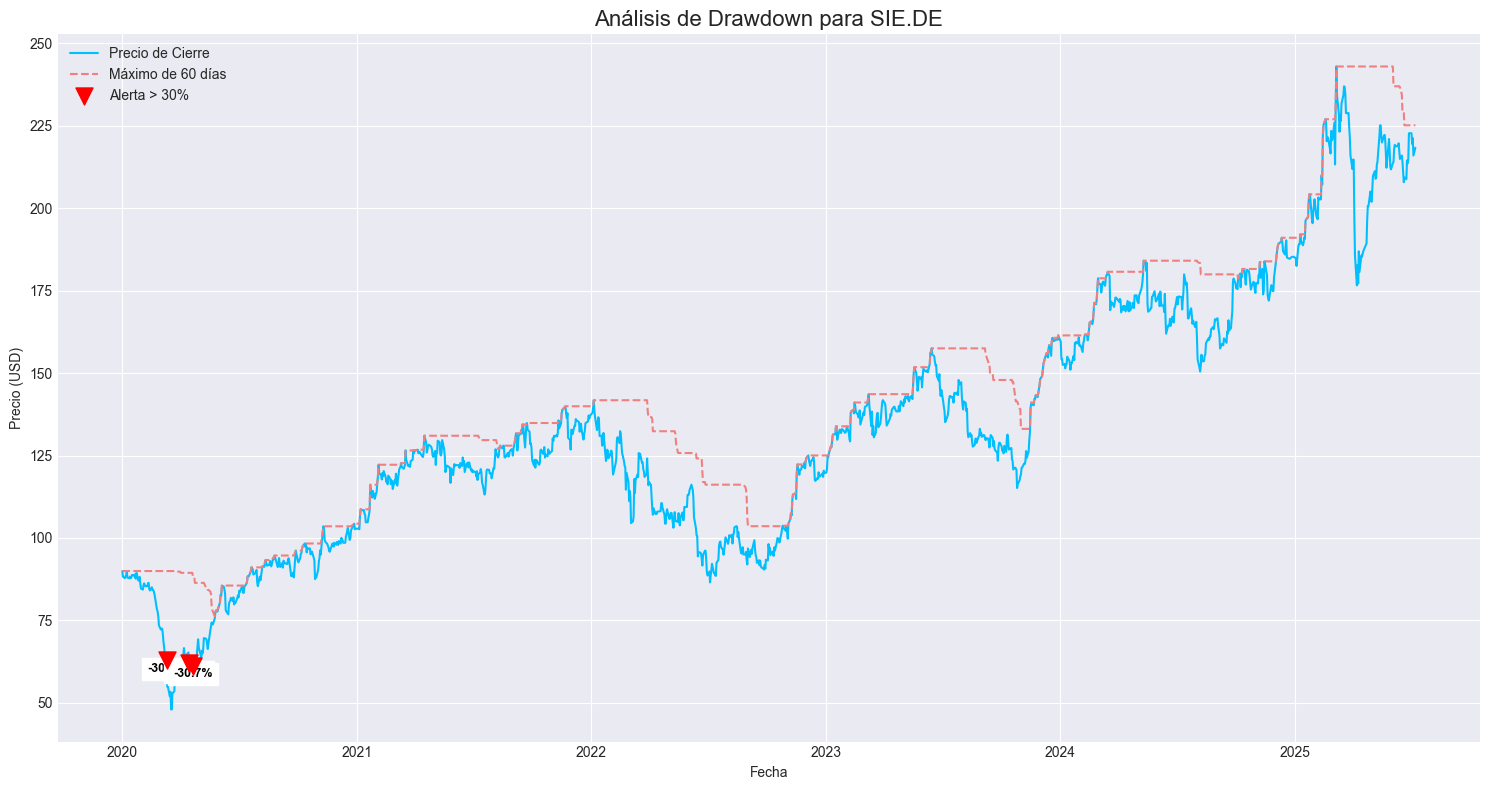


📈 Analizando 7203.T entre 2020-01-01 y 2025-07-08
✅ 1 evento(s) de drawdown detectados:
Price            Close  Maximo_Ventana  Drawdown_%
Date                                              
2024-08-05  2160.37793     3339.293945   -0.353043


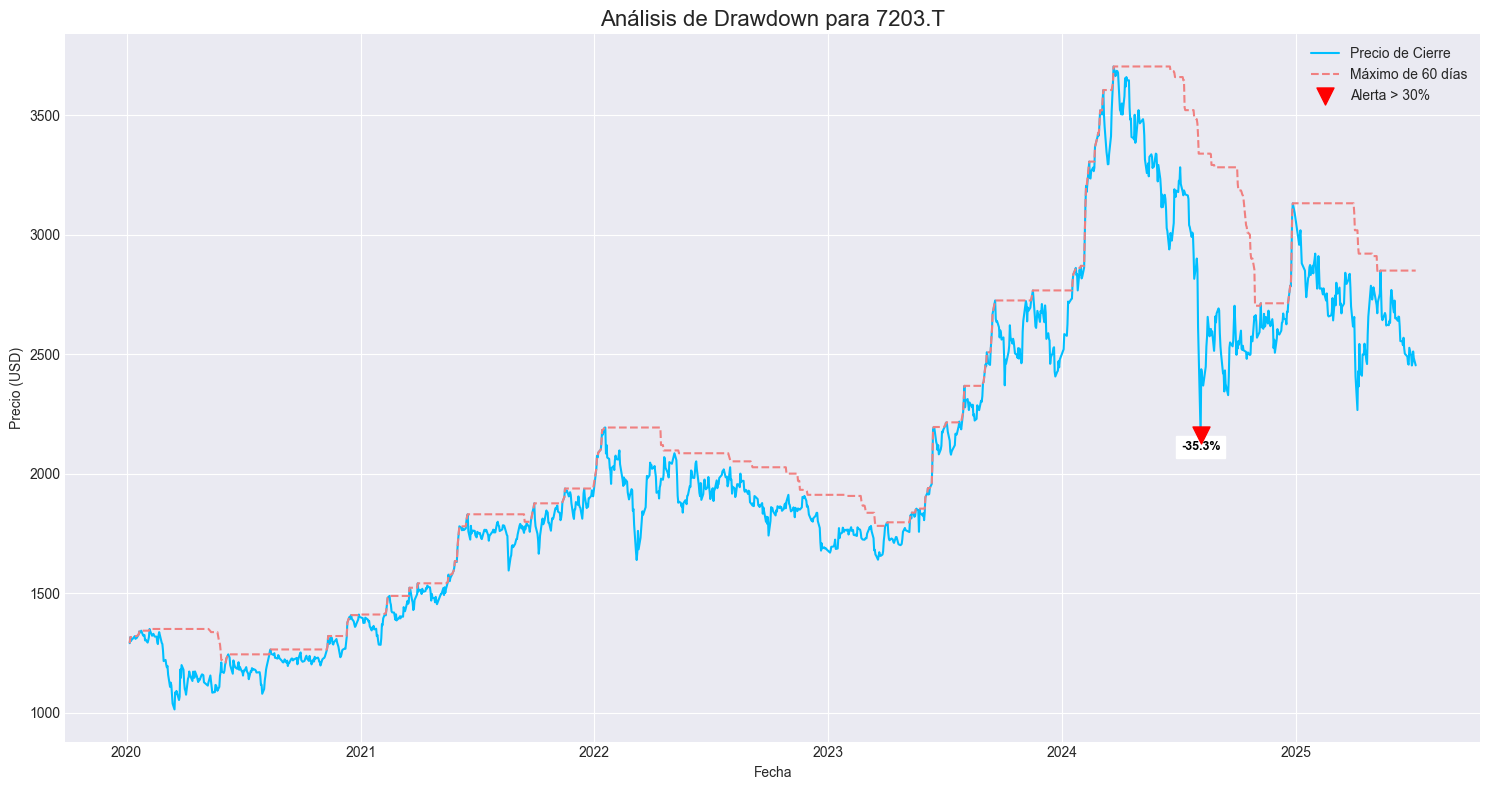


📈 Analizando 6758.T entre 2020-01-01 y 2025-07-08
❌ No se detectaron caídas que cumplan el criterio.


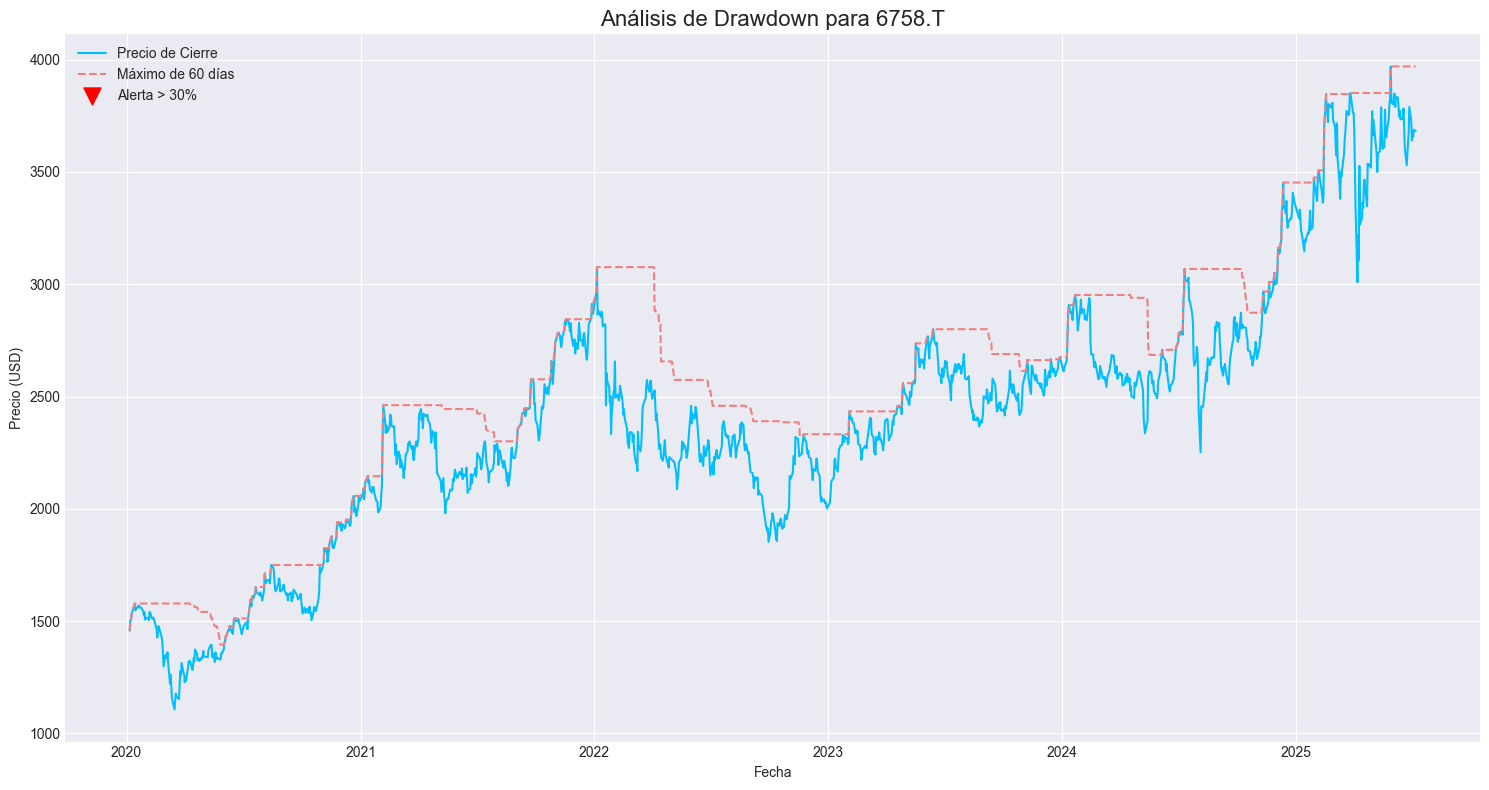


📈 Analizando 9984.T entre 2020-01-01 y 2025-07-08
✅ 10 evento(s) de drawdown detectados:
Price             Close  Maximo_Ventana  Drawdown_%
Date                                               
2020-03-12  3813.769531     5533.045410   -0.310729
2020-03-26  3634.818604     5533.045410   -0.343071
2021-07-26  6916.302734     9898.507812   -0.301278
2022-01-27  4581.606934     6964.199707   -0.342120
2024-08-02  7827.009277    11857.898438   -0.339933
2024-08-19  8231.888672    11857.898438   -0.305789
2024-08-29  8102.565918    11857.898438   -0.316695
2024-09-04  7740.462402    11857.898438   -0.347232
2024-09-17  8125.446289    11857.898438   -0.314765
2025-03-31  7479.000000    10725.504883   -0.302690


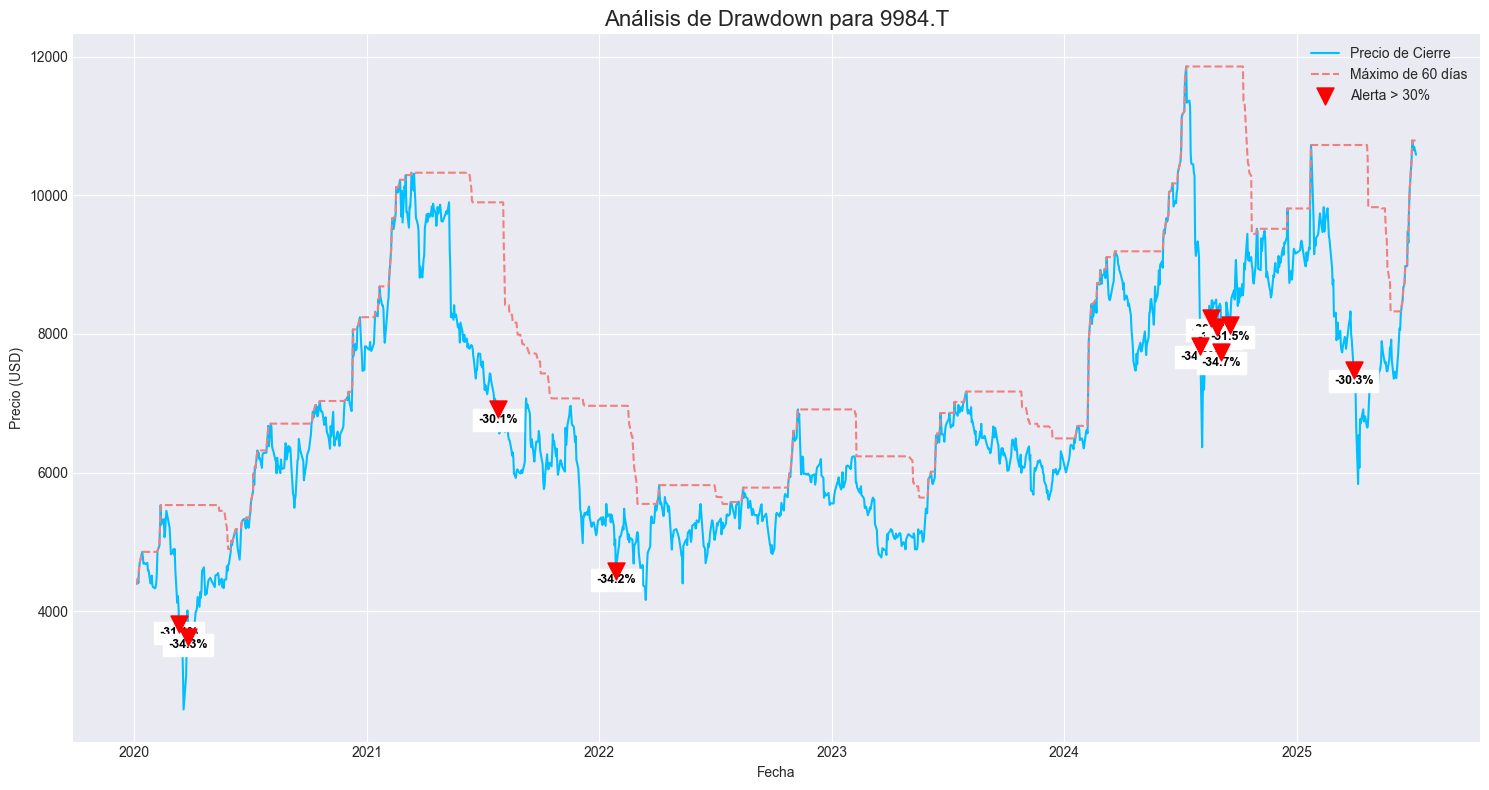

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analizar_drawdown(data_ticker, ticker, ventana_dias, umbral_drawdown):
    """
    Aplica lógica de drawdown a un único ticker.
    """
    df = data_ticker[['Close']].copy()
    df['Maximo_Ventana'] = df['Close'].rolling(window=ventana_dias, min_periods=1).max()
    df['Drawdown_%'] = np.where(df['Maximo_Ventana'] != 0,
                                 (df['Close'] - df['Maximo_Ventana']) / df['Maximo_Ventana'],
                                 np.nan)
    df['Alerta_Activa'] = df['Drawdown_%'] < umbral_drawdown
    df['Ticker'] = ticker
    return df

def graficar_drawdown(df, ticker, ventana_dias, umbral_drawdown):
    """
    Visualiza la serie temporal con anotaciones.
    """
    primeros_eventos = df[df['Alerta_Activa'] & (~df['Alerta_Activa'].shift(1, fill_value=False))]

    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(df.index, df['Close'], label='Precio de Cierre', color='deepskyblue', linewidth=1.5)
    ax.plot(df.index, df['Maximo_Ventana'], label=f'Máximo de {ventana_dias} días', color='lightcoral', linestyle='--')

    ax.scatter(primeros_eventos.index, primeros_eventos['Close'],
               color='red', marker='v', s=150, zorder=5,
               label=f'Alerta > {abs(umbral_drawdown):.0%}')

    for index, row in primeros_eventos.iterrows():
        texto_caida = f"{row['Drawdown_%']:.1%}"
        ax.text(index, row['Close'] * 0.99, texto_caida,
                color='black', backgroundcolor='white',
                ha='center', va='top', fontsize=9, fontweight='bold')

    ax.set_title(f'Análisis de Drawdown para {ticker}', fontsize=16)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio (USD)')
    ax.legend()
    plt.tight_layout()
    plt.show()

def analizar_tickers(tickers, inicio, fin, ventana_dias=60, umbral_drawdown=-0.20):
    datos = yf.download(tickers, start=inicio, end=fin, group_by='ticker', progress=False, auto_adjust=True)
    if isinstance(tickers, str):
        tickers = [tickers]

    eventos_todas_empresas = []

    for ticker in tickers:
        print(f"\n📈 Analizando {ticker} entre {inicio} y {fin}")
        if ticker not in datos.columns.get_level_values(0):
            print(f"⚠️  No hay datos para {ticker}")
            continue
        df_ticker = datos[ticker].dropna()
        if df_ticker.empty:
            print(f"⚠️  Datos vacíos para {ticker}")
            continue

        df = analizar_drawdown(df_ticker, ticker, ventana_dias, umbral_drawdown)

        eventos = df[df['Alerta_Activa'] & (~df['Alerta_Activa'].shift(1, fill_value=False))]
        if not eventos.empty:
            print(f"✅ {len(eventos)} evento(s) de drawdown detectados:")
            print(eventos[['Close', 'Maximo_Ventana', 'Drawdown_%']])
        else:
            print("❌ No se detectaron caídas que cumplan el criterio.")

        graficar_drawdown(df, ticker, ventana_dias, umbral_drawdown)
        eventos_todas_empresas.append(eventos.reset_index())
    # Concatenar todos los eventos de todas las empresas en un solo DataFrame
    eventos_todas_empresas = pd.concat(eventos_todas_empresas, ignore_index=True)
    # set index as datetime
    eventos_todas_empresas.set_index('Date', inplace=True)
    # Renombrar las columnas para mayor claridad
    return eventos_todas_empresas

tickers = [
    # Estados Unidos
    "AAPL",   # Apple
    "MSFT",   # Microsoft
    "AMZN",   # Amazon
    "GOOGL",  # Alphabet (Google)
    "NVDA",   # Nvidia
    "BRK-B",  # Berkshire Hathaway (nota: yf usa "-" no ".")
    "V",      # Visa
    "MA",     # Mastercard
    "UNH",    # UnitedHealth
    "COST",   # Costco
    "ITX", # Inditex (Bolsa española, ticker en Yahoo Finance)
    "IXD1.DE",

    # Europa
    "ITX.MC",     # Inditex (Bolsa española)
    "ASML.AS",    # ASML (Países Bajos)
    "LVMH.PA",    # LVMH (Francia)
    "NESN.SW",    # Nestlé (Suiza)
    "SAP.DE",     # SAP (Alemania)
    "NOVN.SW",    # Novartis (Suiza)
    "SIE.DE",     # Siemens (Alemania)

    # Japón
    "7203.T",     # Toyota
    "6758.T",     # Sony
    "9984.T"      # SoftBank Group
]

eventos = analizar_tickers(
    tickers=tickers,  # Puedes poner los que quieras
    inicio='2020-01-01',
    fin='2025-07-08',
    ventana_dias=60,
    umbral_drawdown=-0.3
)


from datetime import datetime

hoy = pd.Timestamp(datetime.today().date())  # Solo fecha, sin hora
eventos_hoy = eventos[eventos.index.date == hoy.date()]
if not eventos_hoy.empty:
    print("🚨 NUEVAS OPORTUNIDADES")
    print(eventos_hoy)


import os
import smtplib
from email.message import EmailMessage
from datetime import datetime
from dotenv import load_dotenv
load_dotenv()

def crear_mensaje_alerta(destinatario, cuerpo_html, asunto="📉 Nueva alerta de inversión"):
    msg = EmailMessage()
    msg["Subject"] = asunto
    msg["From"] = os.getenv("EMAIL_USER")
    msg["To"] = destinatario
    msg.set_content("Tu cliente de correo no soporta HTML.")
    msg.add_alternative(cuerpo_html, subtype="html")
    return msg

def enviar_alerta_inversion(df_alertas, correo="fernando.carazom@gmail.com"):
    """
    Envía un correo si hay nuevas alertas de drawdown detectadas.
    """
    if df_alertas.empty:
        print("✅ No hay alertas nuevas hoy.")
        return

    df_alertas = df_alertas.reset_index()
    # Sort
    df_alertas.sort_values(by='Date', ascending=False, inplace=True)
    EMAIL_USER = os.getenv("EMAIL_USER")
    EMAIL_PASS = os.getenv("EMAIL_PASS")
    if not all([EMAIL_USER, EMAIL_PASS]):
        print("❌ Faltan variables de entorno necesarias.")
        return

    # Formatear tabla HTML
    html_tabla = df_alertas.to_html(index=False, justify="center", border=0)
    fecha = datetime.today().strftime("%Y-%m-%d")
    cuerpo_html = f"""
    <html>
    <body>
        <h2>📊 Alertas de inversión - {fecha}</h2>
        <p>Se detectaron nuevas oportunidades según el criterio de drawdown.</p>
        {html_tabla}
        <p style="font-size: small; color: gray;">Este correo fue generado automáticamente.</p>
    </body>
    </html>
    """

    asunto = f"📉 {len(df_alertas)} nueva(s) alerta(s) de drawdown - {fecha}"

    try:
        with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:
            smtp.login(EMAIL_USER, EMAIL_PASS)
            msg = crear_mensaje_alerta(correo, cuerpo_html, asunto)
            smtp.send_message(msg)
            print(f"✅ Alerta enviada a {correo}")
    except Exception as e:
        print(f"❌ Error al enviar correos: {e}")


enviar_alerta_inversion(eventos)



In [60]:
eventos

Price,Close,Maximo_Ventana,Drawdown_%,Alerta_Activa,Ticker
Date,,,,,
2020-03-23,54.378586,79.300591,-0.314273,True,AAPL
2025-04-08,172.194199,246.776398,-0.302226,True,AAPL
2022-05-05,116.406998,169.315002,-0.312483,True,AMZN
2022-06-09,116.150002,169.315002,-0.314001,True,AMZN
2022-07-12,109.220001,158.115494,-0.309239,True,AMZN
...,...,...,...,...,...
2024-08-19,8231.888672,11857.898438,-0.305789,True,9984.T
2024-08-29,8102.565918,11857.898438,-0.316695,True,9984.T
2024-09-04,7740.462402,11857.898438,-0.347232,True,9984.T


✅ Alerta enviada a fernando.carazom@gmail.com


# Evaluation

Perfecto, Fer. Preparamos un screener cuantitativo que:

Obtiene una lista de acciones "robustas" (por ejemplo, del S&P 500).

Descarga sus precios ajustados.

Detecta eventos donde cae ≥ 20 % en ≤ 10 días.

Verifica si hubo un rebote de +20 % dentro de los siguientes 30 días.

Resume los resultados históricos para estimar la tasa éxito.



In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import timedelta

def obtener_sp500():
    # Lista rudimentaria desde Wikipedia
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    df = pd.read_html(url, header=0)[0]
    return df['Symbol'].tolist()

def analizar_estrategia(tickers, inicio, fin,
                        drawdown_umbral=0.20,
                        ventana_bajada=30,
                        ventana_rebote=60,
                        rebote_umbral=0.20):
    resultados = []

    # Descargar datos ajustados (auto_adjust=True)
    data = yf.download(tickers, start=inicio, end=fin, group_by='ticker',
                       auto_adjust=True, progress=False)

    for ticker in tickers:
        if ticker not in data.columns.get_level_values(0):
            continue
        df = data[ticker]['Close'].dropna().to_frame(name='Close')
        df['MaxVent'] = df['Close'].rolling(window=ventana_bajada, min_periods=1).max()
        df['Drawdown'] = (df['Close'] - df['MaxVent']) / df['MaxVent']

        # Detectar inicio de caída ≥ umbral en ≤ ventana_bajada
        df['NuevaCaida'] = (
            (df['Drawdown'] <= -drawdown_umbral) &
            (df['Drawdown'].shift(1) > -drawdown_umbral)
        )

        for fecha in df.index[df['NuevaCaida']]:
            price_min = df.loc[fecha, 'Close']
            ventana = df.loc[fecha + timedelta(days=1): fecha + timedelta(days=ventana_rebote)]
            if ventana.empty:
                continue
            max_rebote = ventana['Close'].max()
            rebote = (max_rebote - price_min) / price_min
            exito = rebote >= rebote_umbral

            resultados.append({
                'Ticker': ticker,
                'FechaInicio': fecha,
                'PrecioMin': price_min,
                'ReboteMax': rebote,
                'Exito': exito
            })

    return pd.DataFrame(resultados)

if __name__ == '__main__':
    # tickers = obtener_sp500()[:200]  # limitar a 200 para rapidez
    df_res = analizar_estrategia(
        tickers,
        inicio='2020-01-01',
        fin='2025-06-30',
        drawdown_umbral=0.30,
        ventana_bajada=60,
        ventana_rebote=60,
        rebote_umbral=0.20
    )
    summary = df_res.groupby('Exito').size().rename({True:'Ganancia≥20%', False:'No rebote'}).reset_index()
    print(summary)
    tasa_exito = summary.loc[summary['Exito']=="Ganancia≥20%", 0] / summary[0].sum()
    tasa_exito



2 Failed downloads:
['LVMH.PA', 'ITX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-06-30)')


          Exito   0
0     No rebote  28
1  Ganancia≥20%  44
